In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
# 1. Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
# 2. Normalize the data (scale pixel values between 0 and 1)
x_train, x_test = x_train / 255.0, x_test / 255.0


In [ ]:
# 3. Reshape data to add a single channel (for grayscale images)
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)


In [ ]:
# 4. Define the CNN Model
model = keras.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),  # Convolutional Layer
    layers.MaxPooling2D((2,2)),  # Max Pooling Layer
    layers.Conv2D(64, (3,3), activation='relu'),  # Second Convolutional Layer
    layers.MaxPooling2D((2,2)),  # Max Pooling Again
    layers.Flatten(),  # Flattening Layer
    layers.Dense(64, activation='relu'),  # Fully Connected Layer
    layers.Dense(10, activation='softmax')  # Output Layer (10 classes for digits 0-9)
])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# 5. Compile the Model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [ ]:
# 6. Train the Model
history = model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 55s 29ms/step - accuracy: 0.9013 - loss: 0.3176 - val_accuracy: 0.9857 - val_loss: 0.0468
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 84s 30ms/step - accuracy: 0.9847 - loss: 0.0501 - val_accuracy: 0.9883 - val_loss: 0.0346
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 53s 28ms/step - accuracy: 0.9898 - loss: 0.0346 - val_accuracy: 0.9884 - val_loss: 0.0343
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 28ms/step - accuracy: 0.9923 - loss: 0.0238 - val_accuracy: 0.9906 - val_loss: 0.0298
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 83s 29ms/step - accuracy: 0.9946 - loss: 0.0163 - val_accuracy: 0.9904 - val_loss: 0.0317


In [ ]:
# 7. Evaluate the Model
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {test_acc:.4f}")


313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9873 - loss: 0.0407
Test Accuracy: 0.9904


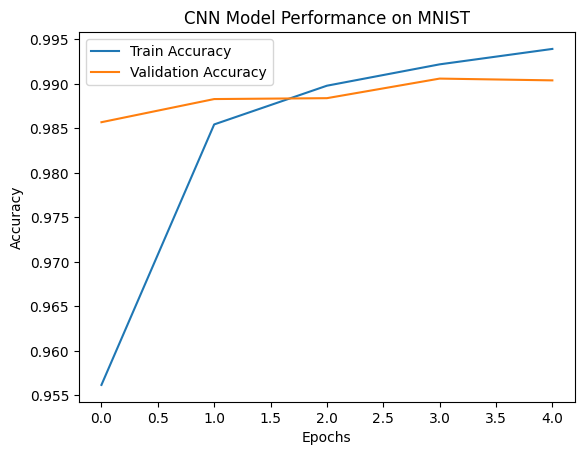

In [ ]:
# 8. Visualize Training Performance
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('CNN Model Performance on MNIST')
plt.show()


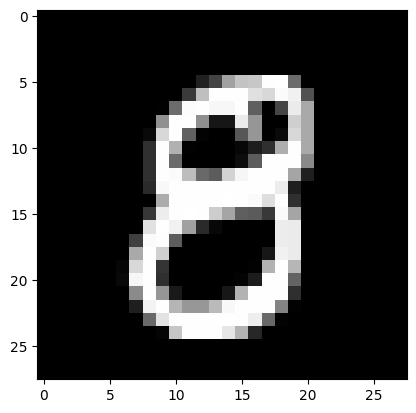

In [ ]:
# 9. Test Model on a Random Image
index = np.random.randint(len(x_test))
sample_image = x_test[index].reshape(28, 28)
plt.imshow(sample_image, cmap='gray')
plt.show()

In [ ]:
# Predict the digit
prediction = np.argmax(model.predict(x_test[index].reshape(1,28,28,1)))
print(f"Predicted Digit: {prediction}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
Predicted Digit: 8
